Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figure 5.11

Analysis of movie duration and gross earnings\
Topics and relevant videos: [Joint probability density function](https://www.youtube.com/watch?v=heOoyzVpdS0), [conditional pdf, independence](https://www.youtube.com/watch?v=BNh0rcLBykA)

Author: Carlos Fernandez-Granda\
Data source: www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# data = pd.read_csv('../data/movie_metadata.csv')
url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/movie_metadata.csv"
data = pd.read_csv(url)

data.dropna(subset=['duration', 'gross'],inplace=True)

font_size = 15
font_size_ticks = 15

duration = data["duration"]
gross = data["gross"]/1e6

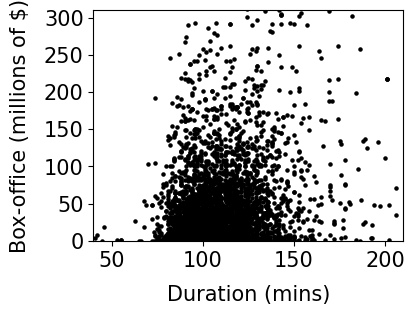

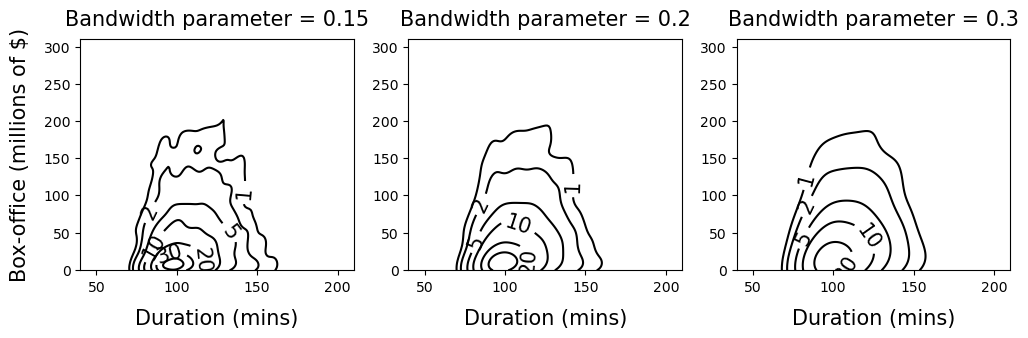

In [2]:
def KDE_2D(data_1,data_2,t_1,t_2,bw=None):
    x,y = np.meshgrid(t_1,t_2)
    grid = np.vstack([x.ravel(), y.ravel()])
    values = np.vstack([data_1, data_2])
    kernel = stats.gaussian_kde(values,bw_method=bw)
    kde = np.reshape(kernel(grid).T, x.shape)
    return kde

def fmt(x):
    s = f"{x:.0f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

xmin = 40 
xmax = 210
ymin = -1
ymax = 310

x_duration = np.linspace(xmin,xmax,200)
x_gross = np.linspace(ymin,ymax,200)

markersize = 5
plt.figure(figsize=(4,3))
plt.scatter(duration,gross,s=markersize,color="black")
plt.xticks([50,100,150,200],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([ymin,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)
plt.xlabel("Duration (mins)",fontsize=font_size,labelpad = 10)

bw_vals = [0.15,0.2,0.3]
levels = [1,2,5,10,20,30,40]

fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[3,3,3])

for ind,bw in enumerate(bw_vals):
    kde = KDE_2D(duration,gross,x_duration,x_gross,bw=bw)
    CS = axes[ind].contour(x_duration,x_gross, 1e5*kde, levels=levels,colors='black')
    axes[ind].clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
    axes[ind].set_xticks([50,100,150,200]) 
    axes[ind].set_ylim([ymin,ymax])
    axes[ind].set_xlim([xmin,xmax])
    if ind == 0:
        axes[ind].set_ylabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)
    axes[ind].set_xlabel("Duration (mins)",fontsize=font_size,labelpad = 10)
    axes[ind].set_title("Bandwidth parameter = "+str(bw),fontsize=font_size,pad = 10);

Text(0.5, 0, 'Box-office (millions of $)')

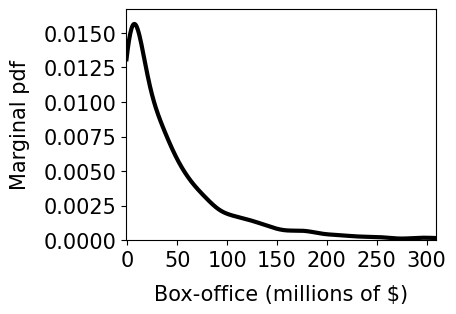

In [3]:
def KDE_1D(data,x,bw=None):
    kernel = stats.gaussian_kde(data,bw_method=bw)
    kde = kernel(x)
    return kde

y_max = 0.0167
x_gross = np.linspace(ymin,ymax,500)
bw = 0.15
kde = KDE_1D(gross,x_gross,bw=bw)
plt.figure(figsize=(4,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(x_gross,kde,color="black",lw=3)
#sns.kdeplot(temperature_2,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
plt.xlim([ymin,ymax])
plt.ylim([0,y_max])
plt.ylabel(r"Marginal pdf",fontsize=font_size,labelpad = 10)
plt.xlabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)

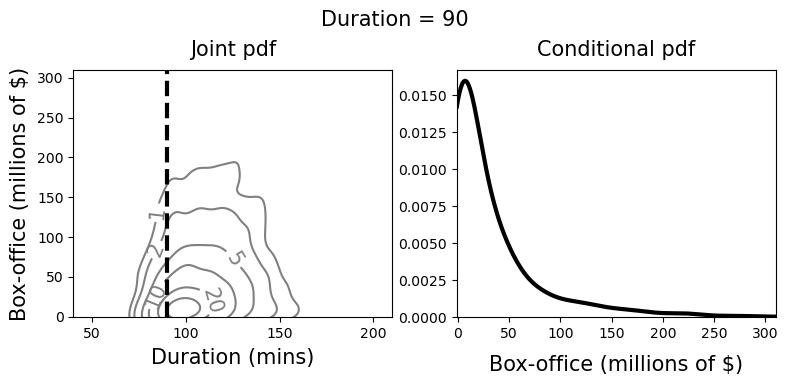

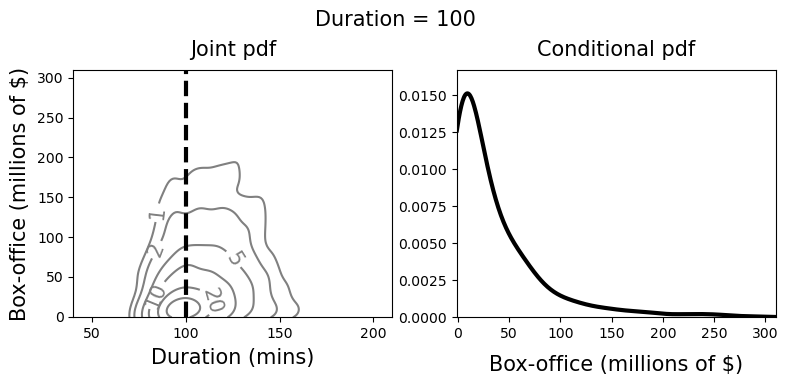

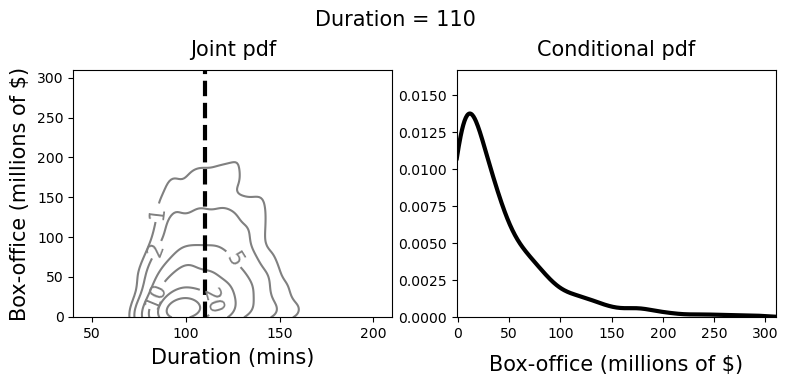

In [4]:
def KDE_cond(data,data_cond,val_cond,t,bw_1D=None,bw_2D=None,verbose=False):
    xmin = data.min()
    xmax = data.max()
    x,y = np.meshgrid(t,val_cond)
    grid = np.vstack([x.ravel(), y.ravel()])
    if verbose:
        print("Grid:")
        print(grid)
    values = np.vstack([data, data_cond])
    kernel_2D = stats.gaussian_kde(values,bw_method=bw_2D)
    kde_2D = np.reshape(kernel_2D(grid).T, x.shape)
    if verbose:
        print("kde_2D: ")
        print(kde_2D)
    kernel_1D = stats.gaussian_kde(data_cond,bw_method=bw)
    kde_1D = kernel_1D(val_cond)
    if verbose:
        print("kde_1D: ")
        print(kde_1D)
    kde_cond = kde_2D / kde_1D
    return kde_cond[0]

cond_vals = [90,100,110]
for ind,cond_val in enumerate(cond_vals):
    
    fig, axes = plt.subplots(1, 2, figsize=(8,4),width_ratios=[1,1])
    fig.suptitle("Duration = " + str(cond_val),fontsize=font_size,y = 0.95)
    
    bw_1D = 0.15
    bw_2D = 0.2
    verbose = False
    
    kde = KDE_2D(duration,gross,x_duration,x_gross,bw=bw_2D)
    levels = [1,2,5,10,20,30,40]
    CS = axes[0].contour(x_duration,x_gross, 1e5*kde, levels=levels,colors='gray')
    axes[0].clabel(CS, CS.levels, inline=True, fmt=fmt,fontsize=font_size_ticks)
    axes[0].vlines(cond_val,ymin,ymax,lw=3,ls="dashed",color="black")
    axes[0].set_xticks([50,100,150,200])
    axes[0].set_ylim([ymin,ymax])
    axes[0].set_xlim([xmin,xmax])
    axes[0].set_title(r"Joint pdf",fontsize=font_size,pad = 10)
    axes[0].set_ylabel("Box-office (millions of $)",fontsize=font_size,labelpad = 5)
    axes[0].set_xlabel("Duration (mins)",fontsize=font_size,labelpad = 5)

    kde = KDE_cond(gross,duration,cond_val,x_gross,bw_1D=bw_1D,bw_2D=bw_2D,verbose=verbose)
    axes[1].plot(x_gross,kde,color="black",lw=3)
    axes[1].set_xlim([ymin,ymax])
    axes[1].set_ylim([0,y_max])
    axes[1].set_title(r"Conditional pdf",fontsize=font_size,pad = 10)
    axes[1].set_xlabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)

    plt.tight_layout();

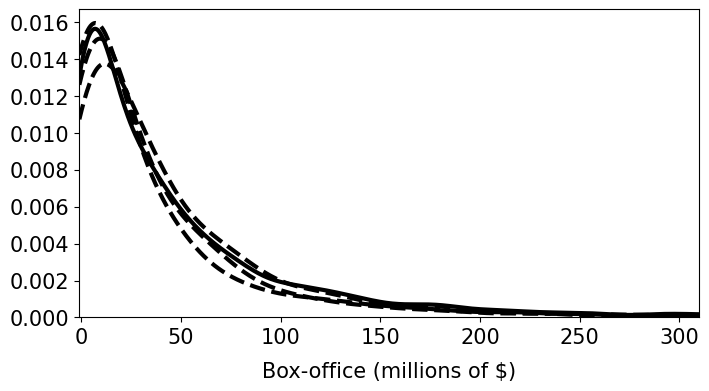

In [5]:
# We superpose the conditional pdfs to show that they are all very similar, showing that the earnings are 
# approximately independent from the movie duration
bw = 0.15
kde = KDE_1D(gross,x_gross,bw=bw)
plt.figure(figsize=(8,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(x_gross,kde,color="black",lw=3)
#sns.kdeplot(temperature_2,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
plt.xlim([ymin,ymax])
plt.ylim([0,y_max])
plt.xlabel("Box-office (millions of $)",fontsize=font_size,labelpad = 10)

cond_vals = [90,100,110]
for ind,cond_val in enumerate(cond_vals):
    
    bw_1D = 0.15
    bw_2D = 0.2
    verbose = False
    kde = KDE_cond(gross,duration,cond_val,x_gross,bw_1D=bw_1D,bw_2D=bw_2D,verbose=verbose)
    plt.plot(x_gross,kde,color="black",lw=3,ls='dashed');    